## Demo for Decision Trees

<a href="https://colab.research.google.com/github/ioskn/mldl_htwg/blob/master/trees_and_rf/Decission_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



In [39]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
from sklearn import tree

# Decission Tree for Classification

In [40]:
from sklearn.datasets import load_iris
iris = load_iris()

In [41]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

In [42]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=2)
#dtree = DecisionTreeClassifier(max_depth=5)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'x[2] <= 4.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.214\nsamples = 41\nvalue = [0, 5, 36]')]

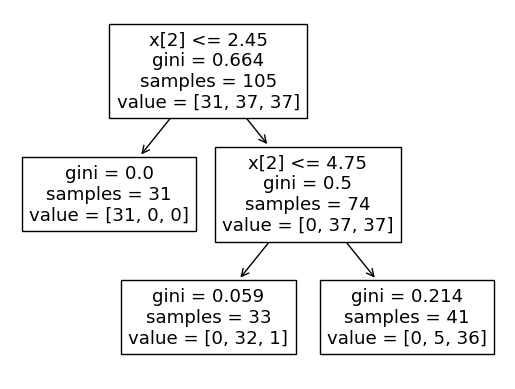

In [43]:
tree.plot_tree(dtree) 

Probabilistic prediction on the test set

In [44]:
ppred = dtree.predict_proba(X_test)
ppred[0:10,]

array([[0.        , 0.96969697, 0.03030303],
       [1.        , 0.        , 0.        ],
       [0.        , 0.12195122, 0.87804878],
       [0.        , 0.96969697, 0.03030303],
       [0.        , 0.12195122, 0.87804878],
       [1.        , 0.        , 0.        ],
       [0.        , 0.96969697, 0.03030303],
       [0.        , 0.12195122, 0.87804878],
       [0.        , 0.96969697, 0.03030303],
       [0.        , 0.96969697, 0.03030303]])

The estimated probabilities for the different classifications can be obtained, by the numbers in the leaves.  

In [45]:
# The possible values for the probability. 
print(f"Probabilities for the leaves [0, 32, 1] {format(0/33, '.5f')}, {format(32/33, '.5f')}, {format(1/33, '.5f')}")
print(f"Probabilities for the leaves [0, 5, 36] {format(0/41, '.5f')}, {format(5/41, '.5f')}, {format(36/41, '.5f')}")

Probabilities for the leaves [0, 32, 1] 0.00000, 0.96970, 0.03030
Probabilities for the leaves [0, 5, 36] 0.00000, 0.12195, 0.87805


Classification of the test set

In [46]:
np.argmax(ppred,axis=1) == y_test

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [47]:
np.mean(np.argmax(ppred,axis=1) == y_test)

0.9777777777777777

### Decission Tree for Regression

Taken from https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py

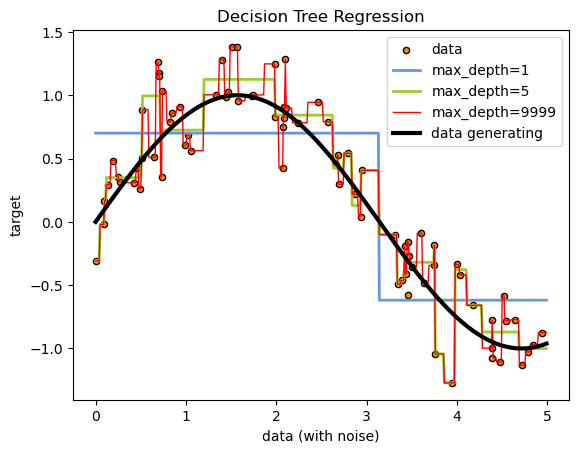

In [48]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)

def create_data():
    X = np.sort(5 * rng.rand(80, 1), axis=0)
    y = np.sin(X).ravel() + np.random.normal(0,0.25,80)
    return X,y

X,y = create_data()
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=1)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=9999)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",label="max_depth=1", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.plot(X_test, y_3, color="red", label="max_depth=9999", linewidth=1)
plt.plot(X_test[:,0], np.sin(X_test[:,0]), linewidth=3, color='black',label="data generating")
plt.xlabel("data (with noise)")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### Demo for Bias and Variance for Decision Trees

Text(0.5, 1.0, '200 trees with max depth = 5')

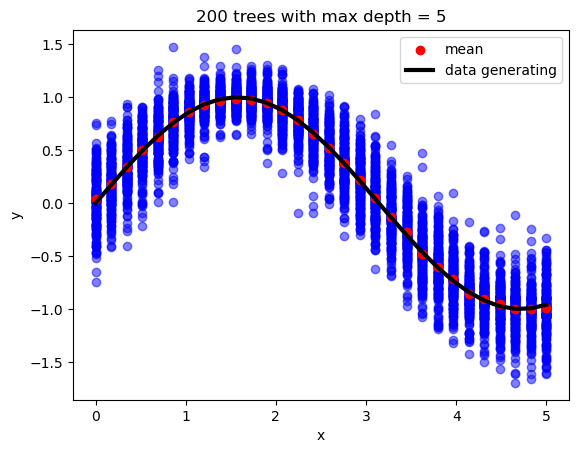

In [49]:
max_depth = 5 #<----------------- Change this value
#for i in range(100):
steps = 30
runs = 200

y_val = np.zeros((runs,steps))
for i in range(runs):
    X,y = create_data()
    # Fit regression model
    regr = DecisionTreeRegressor(max_depth=max_depth)
    regr.fit(X,y)
    X_test = np.linspace(0.0, 5.0, steps)[:, np.newaxis]
    y_1 = regr.predict(X_test)
    y_val[i] = y_1


X_test = np.linspace(0.0, 5.0, steps)[:, np.newaxis]
for i in range(runs):
    plt.scatter(X_test,y_val[i], color='b', alpha=0.5)
plt.scatter(X_test,np.average(y_val,axis=0), color='r', label='mean')
plt.plot(X_test[:,0], np.sin(X_test[:,0]), linewidth=3, color='black',label="data generating")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('{} trees with max depth = {}'.format(runs, max_depth))

### Observations

* Deep Trees have low bias, but hight variance

## Suggestions for playing around
* Change maxdepth to 1

